In [792]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

In [793]:
titanic_train = pd.read_csv("Data/train.csv")
titanic_test = pd.read_csv("Data/test.csv")
titanic_train.describe(include="all")

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
count,8693,8492,8476,8494,8511,8514.000000,8490,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000,8493,8693
unique,8693,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,8473,2
top,0001_01,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,Gollux Reedall,True
freq,1,4602,5439,8,5915,NaN,8291,NaN,NaN,NaN,NaN,NaN,2,4378
mean,NaN,NaN,NaN,NaN,NaN,28.827930,NaN,224.687617,458.077203,173.729169,311.138778,304.854791,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,14.489021,NaN,666.717663,1611.489240,604.696458,1136.705535,1145.717189,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,38.000000,NaN,47.000000,76.000000,27.000000,59.000000,46.000000,NaN,NaN


**Data Preprocessing**

In [794]:
#불필요한 요소 데이터 요소 삭제
titanic_train_drop = titanic_train.drop(["PassengerId", "Name"],axis=1)
titanic_test_drop = titanic_test.drop(["PassengerId", "Name"],axis=1)
# titanic_test_drop

In [795]:
#nan이 포함된 데이터 갯수 확인
titanic_train_drop.isnull().sum()
titanic_test_drop.isnull().sum()

HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
dtype: int64

In [796]:
from sklearn.impute import SimpleImputer

service_list= ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "VIP", "HomePlanet", "CryoSleep", "Destination"]

imr = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
for item in service_list:
    
    imr = imr.fit(titanic_train_drop[[item]])
    titanic_train_drop[[item]] = imr.transform(titanic_train_drop[[item]])
    titanic_test_drop[[item]] = imr.transform(titanic_test_drop[[item]])
titanic_train_drop.describe(include='all')

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8693,8693,8494,8693,8514.000000,8693,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693
unique,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,2
top,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,True
freq,4803,5656,8,6097,NaN,8494,NaN,NaN,NaN,NaN,NaN,4378
mean,NaN,NaN,NaN,NaN,28.827930,NaN,220.009318,448.434027,169.572300,304.588865,298.261820,NaN
std,NaN,NaN,NaN,NaN,14.489021,NaN,660.519050,1595.790627,598.007164,1125.562559,1134.126417,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,19.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,38.000000,NaN,41.000000,61.000000,22.000000,53.000000,40.000000,NaN


In [797]:
imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(titanic_train_drop[["Age"]])
titanic_train_drop[["Age"]] = imr.transform(titanic_train_drop[["Age"]])
titanic_test_drop[["Age"]] = imr.transform(titanic_test_drop[["Age"]])
titanic_train_drop.describe(include='all')

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8693,8693,8494,8693,8693.000000,8693,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693
unique,3,2,6560,3,NaN,2,NaN,NaN,NaN,NaN,NaN,2
top,Earth,False,G/734/S,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,True
freq,4803,5656,8,6097,NaN,8494,NaN,NaN,NaN,NaN,NaN,4378
mean,NaN,NaN,NaN,NaN,28.827930,NaN,220.009318,448.434027,169.572300,304.588865,298.261820,NaN
std,NaN,NaN,NaN,NaN,14.339054,NaN,660.519050,1595.790627,598.007164,1125.562559,1134.126417,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,20.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,37.000000,NaN,41.000000,61.000000,22.000000,53.000000,40.000000,NaN


In [798]:
imr = SimpleImputer(missing_values=np.nan, strategy='constant',fill_value="U/-1/P")
imr = imr.fit(titanic_train_drop[["Cabin"]])
titanic_train_drop[["Cabin"]] = imr.transform(titanic_train_drop[["Cabin"]])
titanic_test_drop[["Cabin"]] = imr.transform(titanic_test_drop[["Cabin"]])
titanic_train_drop.describe(include='all')

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported
count,8693,8693,8693,8693,8693.000000,8693,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693
unique,3,2,6561,3,NaN,2,NaN,NaN,NaN,NaN,NaN,2
top,Earth,False,U/-1/P,TRAPPIST-1e,NaN,False,NaN,NaN,NaN,NaN,NaN,True
freq,4803,5656,199,6097,NaN,8494,NaN,NaN,NaN,NaN,NaN,4378
mean,NaN,NaN,NaN,NaN,28.827930,NaN,220.009318,448.434027,169.572300,304.588865,298.261820,NaN
std,NaN,NaN,NaN,NaN,14.339054,NaN,660.519050,1595.790627,598.007164,1125.562559,1134.126417,NaN
min,NaN,NaN,NaN,NaN,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,20.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,NaN,NaN,NaN,NaN,27.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,NaN,NaN,NaN,NaN,37.000000,NaN,41.000000,61.000000,22.000000,53.000000,40.000000,NaN


In [799]:
#nan이 포함된 데이터 행 삭제
titanic_train_drop = titanic_train_drop.dropna(axis=0)
print("생략된 데이터 갯수: ",len(titanic_train.index) - len(titanic_train_drop.index))
# titanic_train_drop.describe(include='all')

titanic_test_drop = titanic_test_drop.dropna(axis=0)
print("생략된 데이터 갯수: ",len(titanic_test.index) - len(titanic_test_drop.index))
# titanic_test_drop.describe(include='all')

생략된 데이터 갯수:  0
생략된 데이터 갯수:  0


In [800]:
#cabin 데이터 분석하여 리턴
def split_cabin_data(data):
    cabin = []
    for item in data["Cabin"]:
        item = item.split('/')
        cabin.append([item[0], item[1], item[2]])

    cabin_np = np.array(cabin)
    result_data = pd.DataFrame(cabin_np, columns=["cabin_deck","cabin_num","cabin_side"])
    result_data.index = data.index
    return result_data

In [801]:
#cabin 데이터 가공
cabin_train = split_cabin_data(titanic_train_drop)
cabin_test = split_cabin_data(titanic_test_drop)

titanic_train_drop = pd.concat([titanic_train_drop.drop(["Cabin"],axis=1), cabin_train], axis=1)
titanic_test_drop = pd.concat([titanic_test_drop.drop(["Cabin"],axis=1), cabin_test], axis=1)
titanic_train_drop

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,cabin_deck,cabin_num,cabin_side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,False,A,98,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,False,G,1499,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,True,G,1500,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,False,E,608,S


In [802]:
titanic_train_encoded = titanic_train_drop.copy()
titanic_test_encoded = titanic_test_drop.copy()

catgory_list = ["CryoSleep", "VIP", "cabin_deck", "cabin_side"]

le = LabelEncoder()
for item in catgory_list:
    le.fit(titanic_train_drop[item])
    titanic_train_encoded[item] = le.transform(titanic_train_drop[item])
    titanic_test_encoded[item] = le.transform(titanic_test_drop[item])
    
titanic_train_encoded

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,cabin_deck,cabin_num,cabin_side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,False,1,0,0
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,True,5,0,1
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0,0,1
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0,0,1
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,True,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,0,55 Cancri e,41.0,1,0.0,6819.0,0.0,1643.0,74.0,False,0,98,0
8689,Earth,1,PSO J318.5-22,18.0,0,0.0,0.0,0.0,0.0,0.0,False,6,1499,1
8690,Earth,0,TRAPPIST-1e,26.0,0,0.0,0.0,1872.0,1.0,0.0,True,6,1500,1
8691,Europa,0,55 Cancri e,32.0,0,0.0,1049.0,0.0,353.0,3235.0,False,4,608,1


In [803]:
ohe = OneHotEncoder(sparse=False)

# titanic_train_encoded.drop("HomePlanet", axis=1)
# ohe.fit(titanic_train_drop["HomePlanet"])
ohe.fit(titanic_train_encoded[["HomePlanet"]])
homeplanet_train = pd.DataFrame(ohe.transform(titanic_train_encoded[["HomePlanet"]]),columns=["homeplanet0", "homeplanet1", "homeplanet3"], index=titanic_train_encoded.index)
homeplanet_test = pd.DataFrame(ohe.transform(titanic_test_encoded[["HomePlanet"]]),columns=["homeplanet0", "homeplanet1", "homeplanet3"], index=titanic_test_encoded.index)
titanic_train_encoded = pd.concat([titanic_train_encoded.drop(["HomePlanet"],axis=1), homeplanet_train], axis=1)
titanic_test_encoded = pd.concat([titanic_test_encoded.drop(["HomePlanet"],axis=1), homeplanet_test], axis=1)


ohe.fit(titanic_train_encoded[["Destination"]])
destination_train = pd.DataFrame(ohe.transform(titanic_train_encoded[["Destination"]]),columns=["Destination0", "Destination1","Destination2"], index=titanic_train_encoded.index)
destination_test = pd.DataFrame(ohe.transform(titanic_test_encoded[["Destination"]]),columns=["Destination0","Destination1","Destination2"], index=titanic_test_encoded.index)
titanic_train_encoded = pd.concat([titanic_train_encoded.drop(["Destination"],axis=1), destination_train], axis=1)
titanic_test_encoded = pd.concat([titanic_test_encoded.drop(["Destination"],axis=1), destination_test], axis=1)

titanic_test_encoded.describe()

c:\Users\AI-lab\anaconda3\envs\kaggle\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\AI-lab\anaconda3\envs\kaggle\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,cabin_deck,cabin_side,homeplanet0,homeplanet1,homeplanet3,Destination0,Destination1,Destination2
count,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000,4277.000000
mean,0.361001,28.661759,0.017302,215.062427,428.592238,173.233107,295.895955,304.898293,4.438859,0.489362,0.549451,0.234276,0.216273,0.196633,0.090718,0.712649
std,0.480347,14.027405,0.130409,601.914503,1510.155974,554.991776,1104.872018,1235.991811,1.786765,0.499945,0.497607,0.423595,0.411751,0.397499,0.287241,0.452580
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,37.000000,0.000000,48.000000,66.000000,27.000000,43.000000,31.000000,6.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,79.000000,1.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [804]:
numeric_list = [["Age"], ["RoomService"], ["FoodCourt"], ["ShoppingMall"], ["Spa"], ["VRDeck"], ["cabin_num"]]
sc = StandardScaler()

for item in numeric_list:
    sc.fit(titanic_train_encoded[item])
    titanic_train_encoded[item] = sc.transform(titanic_train_encoded[item])
    titanic_test_encoded[item] = sc.transform(titanic_test_encoded[item])


In [805]:
titanic_train_preproc = titanic_train_encoded.copy()
titanic_train_preproc["Transported"] = le.fit_transform(titanic_train_encoded["Transported"])
titanic_test_preproc = titanic_test_encoded.copy()

titanic_train_preproc.describe()
titanic_train_preproc

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,cabin_deck,cabin_num,cabin_side,homeplanet0,homeplanet1,homeplanet3,Destination0,Destination1,Destination2
0,0,0.709437,0,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,0,1,-1.141521,0,0.0,1.0,0.0,0.0,0.0,1.0
1,0,-0.336717,0,-0.168073,-0.275387,-0.241771,0.217158,-0.224205,1,5,-1.141521,1,1.0,0.0,0.0,0.0,0.0,1.0
2,0,2.034566,1,-0.268001,1.959998,-0.283579,5.695623,-0.219796,0,0,-1.141521,1,0.0,1.0,0.0,0.0,0.0,1.0
3,0,0.290975,0,-0.333105,0.523010,0.336851,2.687176,-0.092818,0,0,-1.141521,1,0.0,1.0,0.0,0.0,0.0,1.0
4,0,-0.894666,0,0.125652,-0.237159,-0.031059,0.231374,-0.261240,1,5,-1.139575,1,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,0,0.848924,1,-0.333105,3.992336,-0.283579,1.189173,-0.197751,0,0,-0.950814,0,0.0,1.0,0.0,1.0,0.0,0.0
8689,1,-0.755179,0,-0.333105,-0.281027,-0.283579,-0.270626,-0.263003,0,6,1.775521,1,1.0,0.0,0.0,0.0,1.0,0.0
8690,0,-0.197230,0,-0.333105,-0.281027,2.846999,-0.269737,-0.263003,1,6,1.777467,1,1.0,0.0,0.0,0.0,0.0,1.0
8691,0,0.221232,0,-0.333105,0.376365,-0.283579,0.043013,2.589576,0,4,0.041642,1,0.0,1.0,0.0,1.0,0.0,0.0


In [806]:
from sklearn.model_selection import train_test_split

titanic_train_x , titanic_train_y = titanic_train_preproc.drop("Transported", axis=1), titanic_train_preproc["Transported"]
X_train, X_test, y_train, y_test = train_test_split(titanic_train_x, titanic_train_y, test_size=0.3, stratify=titanic_train_y, random_state=0)

In [807]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
x_train_pca = pca.fit_transform(X_train)
x_test_pca = pca.transform(X_test)
titanic_test_pca = pca.transform(titanic_test_preproc)

print((pca.explained_variance_ratio_*100).sum())

95.10293691078671


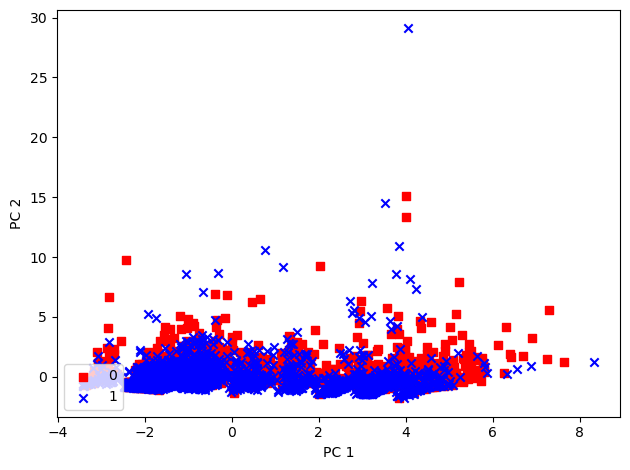

In [808]:
colors = ['r', 'b'] 
markers = ['s', 'x'] 
for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(x_train_pca[y_train == l, 0], x_train_pca[y_train == l, 1], c=c, label=l, marker=m) 
    plt.xlabel('PC 1') 
    plt.ylabel('PC 2')
    plt.legend(loc='lower left') 
    plt.tight_layout() 
plt.show()

In [809]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(25,25),max_iter=1000,alpha=1e-3, solver='sgd', verbose=100, tol=1e-4, random_state=0, learning_rate_init=0.005)
mlp.fit(x_train_pca, y_train)

Iteration 1, loss = 0.67252438
Iteration 2, loss = 0.62391504
Iteration 3, loss = 0.58913913
Iteration 4, loss = 0.56119291
Iteration 5, loss = 0.53772492
Iteration 6, loss = 0.51793625
Iteration 7, loss = 0.50128134
Iteration 8, loss = 0.48792097
Iteration 9, loss = 0.47725630
Iteration 10, loss = 0.46932738
Iteration 11, loss = 0.46339071
Iteration 12, loss = 0.45911441
Iteration 13, loss = 0.45580409
Iteration 14, loss = 0.45257838
Iteration 15, loss = 0.45046208
Iteration 16, loss = 0.44825729
Iteration 17, loss = 0.44644340
Iteration 18, loss = 0.44467802
Iteration 19, loss = 0.44317840
Iteration 20, loss = 0.44181146
Iteration 21, loss = 0.44084984
Iteration 22, loss = 0.43962520
Iteration 23, loss = 0.43868948
Iteration 24, loss = 0.43830580
Iteration 25, loss = 0.43710117
Iteration 26, loss = 0.43624018
Iteration 27, loss = 0.43548994
Iteration 28, loss = 0.43449950
Iteration 29, loss = 0.43390325
Iteration 30, loss = 0.43333190
Iteration 31, loss = 0.43250608
Iteration 32, los

MLPClassifier(alpha=0.001, hidden_layer_sizes=(25, 25),
              learning_rate_init=0.005, max_iter=1000, random_state=0,
              solver='sgd', verbose=100)

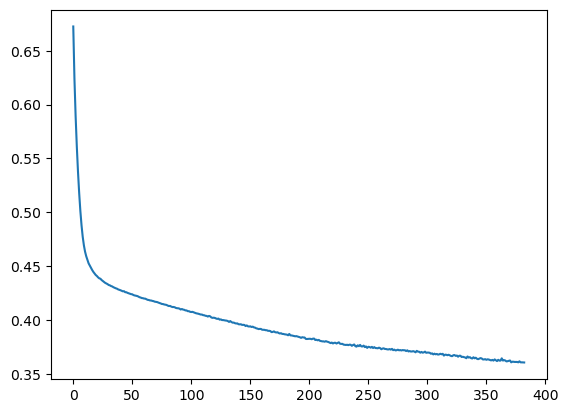

Train set score: 0.8256368118323747
Test set score: 0.8013803680981595


In [810]:
plt.plot(mlp.loss_curve_)
plt.show()

print("Train set score: {}".format(mlp.score(x_train_pca, y_train)))
print("Test set score: {}".format(mlp.score(x_test_pca, y_test)))

In [811]:
titanic_test_y = mlp.predict(titanic_test_pca)

titanic_test_result = pd.DataFrame(titanic_test_y, columns=["Transported"])
result_mapping = {0:"False", 1:"True"}
titanic_test_result["Transported"] = titanic_test_result["Transported"].map(result_mapping)
titanic_test_result

,Transported
0,TRUE
1,TRUE
2,FALSE
3,FALSE
4,TRUE
...,...
4272,FALSE
4273,TRUE
4274,FALSE
4275,FALSE


In [818]:
submission_result = pd.concat((titanic_test["PassengerId"], titanic_test_result),axis=1)
submission_result

sample_submission_df = pd.read_csv('Data/sample_submission.csv')
print(sample_submission_df.head())
sample_submission_df['Transported'] = titanic_test_result['Transported']
sample_submission_df.to_csv('Data/submission.csv', index=False)
print()
print(submission_result.head())

  PassengerId  Transported
0     0013_01        False
1     0018_01        False
2     0019_01        False
3     0021_01        False
4     0023_01        False

  PassengerId Transported
0     0013_01        TRUE
1     0018_01        TRUE
2     0019_01       FALSE
3     0021_01       FALSE
4     0023_01        TRUE


In [813]:
submission_result.to_csv("submission.csv", index = False)